In [11]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

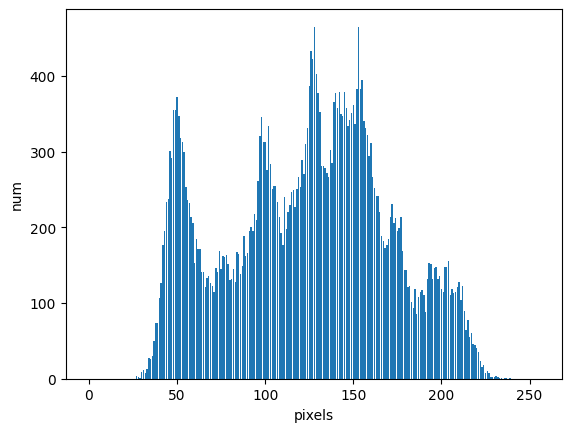

82.0


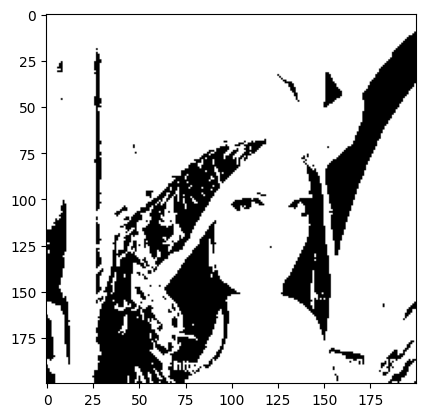

In [12]:

def OTSU(img_array):            #传入的参数为ndarray形式
    height = img_array.shape[0]
    width = img_array.shape[1]
    count_pixel = np.zeros(256)

    for i in range(height):
        for j in range(width):
            count_pixel[int(img_array[i][j])] += 1 

    fig = plt.figure()        #通过绘制直方图可以观察像素的分布情况
    ax = fig.add_subplot(111)
    ax.bar(np.linspace(0, 255, 256), count_pixel)
    ax.set_xlabel("pixels")
    ax.set_ylabel("num")
    plt.show()

    max_variance = 0.0
    best_thresold = 0
    for thresold in range(256):
        n0 = count_pixel[:thresold].sum()
        n1 = count_pixel[thresold:].sum()
        w0 = n0 / (height * width)
        w1 = n1 / (height * width)
        u0 = 0.0
        u1 = 0.0

        for i in range(thresold):
            u0 += i * count_pixel[i]
        for j in range(thresold, 256):
            u1 += j * count_pixel[j]

        u = u0 * w0 + u1 * w1 
        tmp_var = w0 * np.power((u - u0), 2) + w1 * np.power((u - u1), 2)

        if tmp_var > max_variance:
            best_thresold = thresold
            max_variance = tmp_var

    return best_thresold
img = cv2.imread("lena.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
img = cv2.resize(gray,(200,200))#大小
img = np.array(img).astype(np.float32)
best_thresold=OTSU(img)
ret2, th2 = cv2.threshold(img, best_thresold, 255, cv2.THRESH_BINARY)
print(ret2)
plt.imshow(th2,cmap=cm.gray)
plt.show()  


133.0


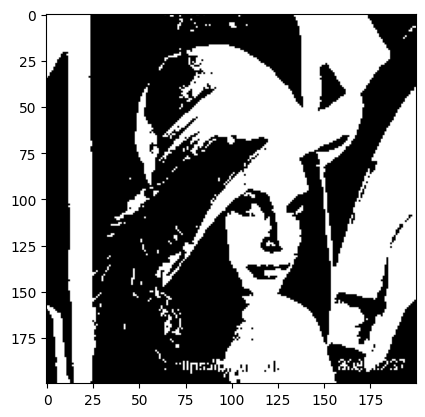

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
def diedai(img):
    img_array = np.array(img).astype(np.float32)#转化成数组
    I=img_array
    zmax=np.max(I)
    zmin=np.min(I)
    tk=(zmax+zmin)/2#设置初始阈值
    #根据阈值将图像进行分割为前景和背景，分别求出两者的平均灰度  zo和zb
    b=1
    m,n=I.shape;
    while b==0:
        ifg=0
        ibg=0
        fnum=0
        bnum=0
        for i in range(1,m):
             for j in range(1,n):
                tmp=I(i,j)
                if tmp>=tk:
                    ifg=ifg+1
                    fnum=fnum+int(tmp)  #前景像素的个数以及像素值的总和
                else:
                    ibg=ibg+1
                    bnum=bnum+int(tmp)#背景像素的个数以及像素值的总和
        #计算前景和背景的平均值
        zo=int(fnum/ifg)
        zb=int(bnum/ibg)
        if tk==int((zo+zb)/2):
            b=0
        else:
            tk=int((zo+zb)/2)
    return tk
img = cv2.imread("lena.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
img = cv2.resize(gray,(200,200))#大小
yvzhi=diedai(img)
ret1, th1 = cv2.threshold(img, yvzhi, 255, cv2.THRESH_BINARY)
print(ret1)
plt.imshow(th1,cmap=cm.gray)
plt.show()
